# Healthcare Classification Dataset Test

This notebook tests the download and loading of the Healthcare Classification dataset from Kaggle.

In [1]:
# Install required packages
%pip install kagglehub pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

# Download the dataset to current directory
print("Downloading Healthcare Classification dataset...")
cache_path = kagglehub.dataset_download("prasad22/healthcare-dataset")

# Copy to current folder
current_dir = os.getcwd()
local_data_dir = current_dir
os.makedirs(local_data_dir, exist_ok=True)

# Copy files from cache to local directory
for file in os.listdir(cache_path):
    src = os.path.join(cache_path, file)
    dst = os.path.join(local_data_dir, file)
    shutil.copy2(src, dst)
    print(f"Copied {file} to local data folder")

path = local_data_dir
print(f"Dataset available locally at: {path}")

/home/tamim/ai4ph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Copied healthcare_dataset.csv to local data folder
Dataset available locally at: /home/tamim/ai4ph/data/healthcare_classification


In [3]:
# Check dataset size
total_size = 0
files = os.listdir(path)
for file in files:
    file_path = os.path.join(path, file)
    size = os.path.getsize(file_path)
    total_size += size
    print(f"- {file}: {size/1024:.1f} KB")

print(f"\nTotal dataset size: {total_size/(1024*1024):.2f} MB")

- README.md: 1.0 KB
- dataset_download.ipynb: 186.8 KB
- healthcare_dataset.csv: 8202.4 KB

Total dataset size: 8.19 MB


In [4]:
# Load and explore the data
csv_files = [f for f in files if f.endswith('.csv')]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    
    print(f"Dataset shape: {df.shape}")
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nData types:\n{df.dtypes}")
    print(f"\nFirst 5 rows:\n{df.head()}")
    
    # Check for target variable (likely the last column or named outcome)
    potential_targets = [col for col in df.columns if any(keyword in col.lower() 
                        for keyword in ['target', 'outcome', 'result', 'diagnosis', 'class'])]
    
    if potential_targets:
        target_col = potential_targets[0]
    else:
        target_col = df.columns[-1]  # Assume last column is target
    
    print(f"\nTarget variable '{target_col}' distribution:")
    print(df[target_col].value_counts())
    
    # Check for missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\nMissing values:\n{missing[missing > 0]}")
    else:
        print("\n✅ No missing values found")
    
    # Basic statistics
    print(f"\nBasic statistics:\n{df.describe()}")

Dataset shape: (55500, 15)

Columns: ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']

Data types:
Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

First 5 rows:
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    D

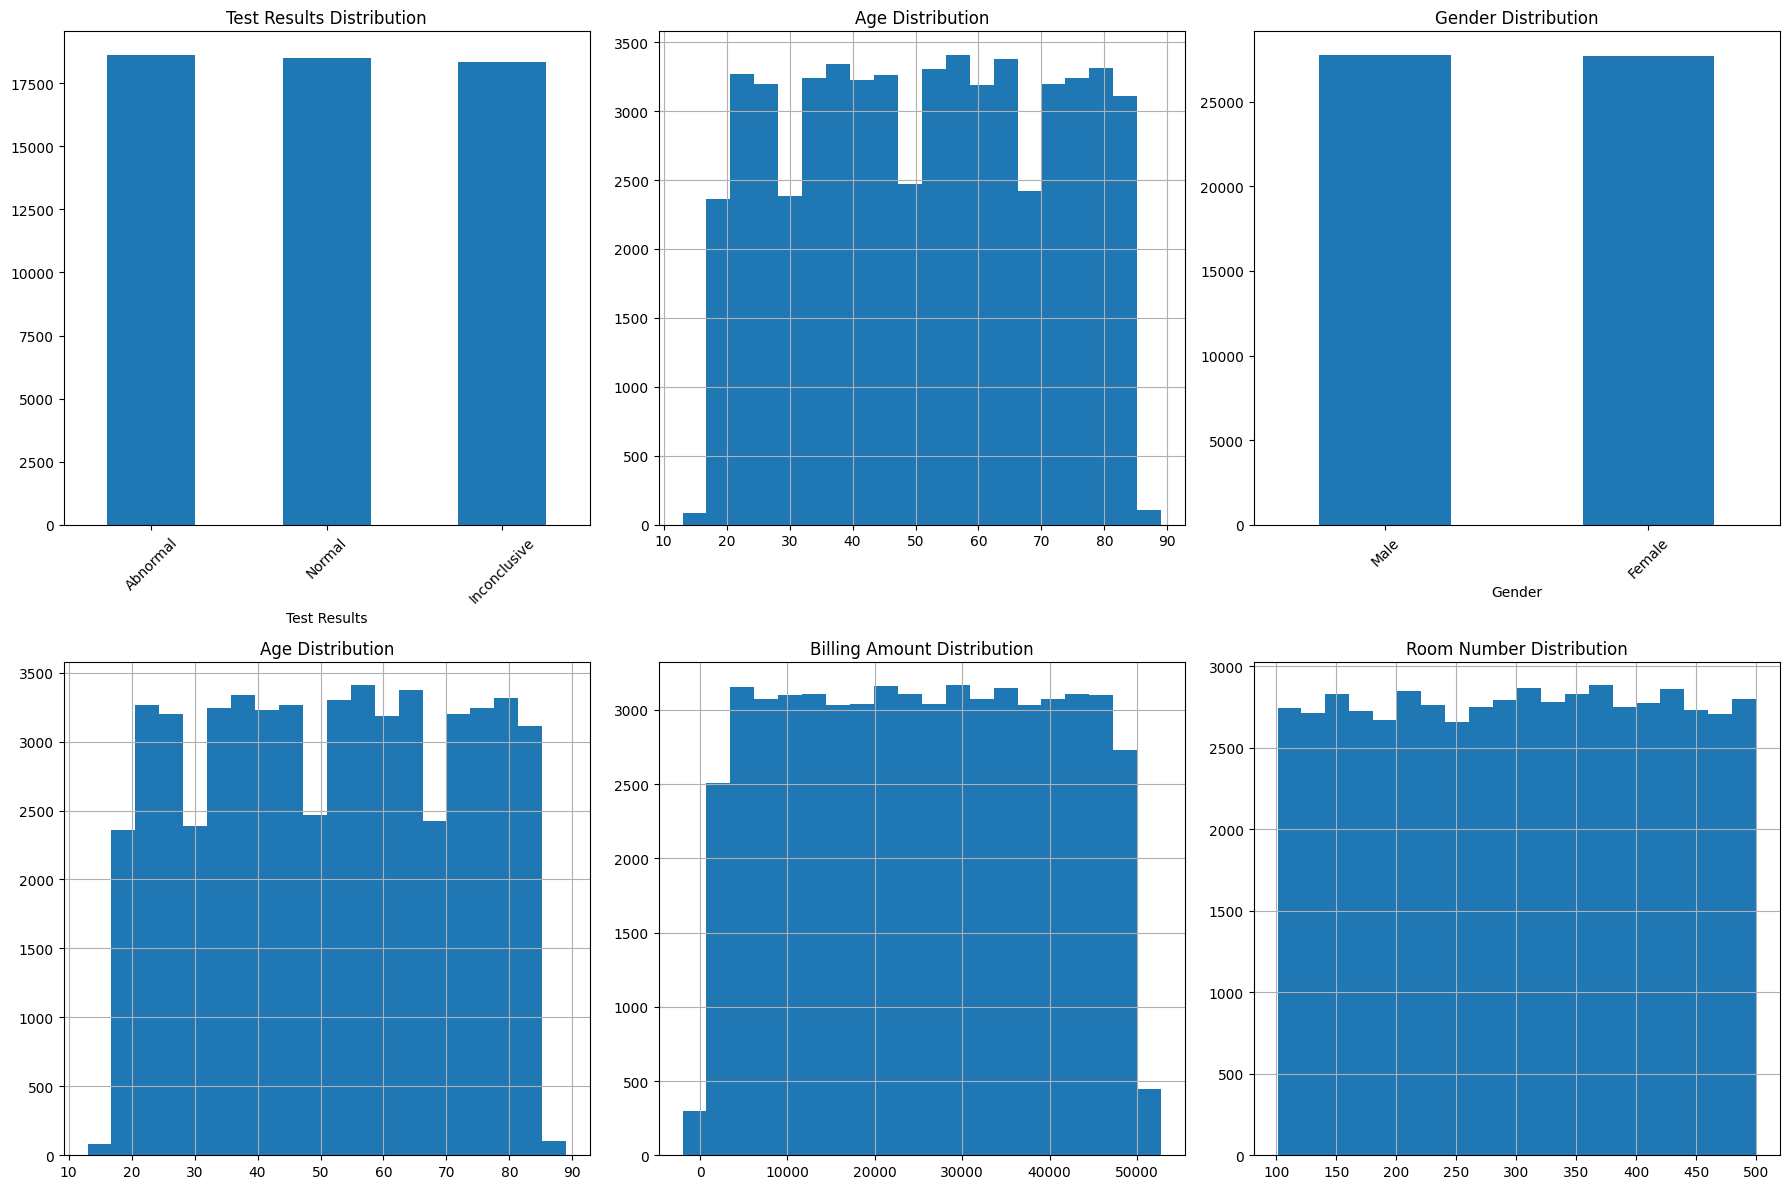

In [5]:
# Create comprehensive healthcare visualizations
if csv_files and len(df) > 0:
    # Determine target column
    potential_targets = [col for col in df.columns if any(keyword in col.lower() 
                        for keyword in ['target', 'outcome', 'result', 'diagnosis', 'class'])]
    target_col = potential_targets[0] if potential_targets else df.columns[-1]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    # Target distribution
    df[target_col].value_counts().plot(kind='bar', ax=axes[0])
    axes[0].set_title(f'{target_col} Distribution')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Age distribution (if available)
    age_cols = [col for col in df.columns if 'age' in col.lower()]
    if age_cols:
        df[age_cols[0]].hist(bins=20, ax=axes[1])
        axes[1].set_title(f'{age_cols[0]} Distribution')
    
    # Gender distribution (if available)
    gender_cols = [col for col in df.columns if any(keyword in col.lower() 
                  for keyword in ['gender', 'sex'])]
    if gender_cols:
        df[gender_cols[0]].value_counts().plot(kind='bar', ax=axes[2])
        axes[2].set_title(f'{gender_cols[0]} Distribution')
        axes[2].tick_params(axis='x', rotation=45)
    
    # Numeric feature distributions
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_features = [col for col in numeric_cols if col != target_col]
    
    for i, feature in enumerate(numeric_features[:3]):
        if i+3 < len(axes):
            df[feature].hist(bins=20, ax=axes[i+3])
            axes[i+3].set_title(f'{feature} Distribution')
    
    # Hide unused subplots
    for j in range(len(numeric_features)+3, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

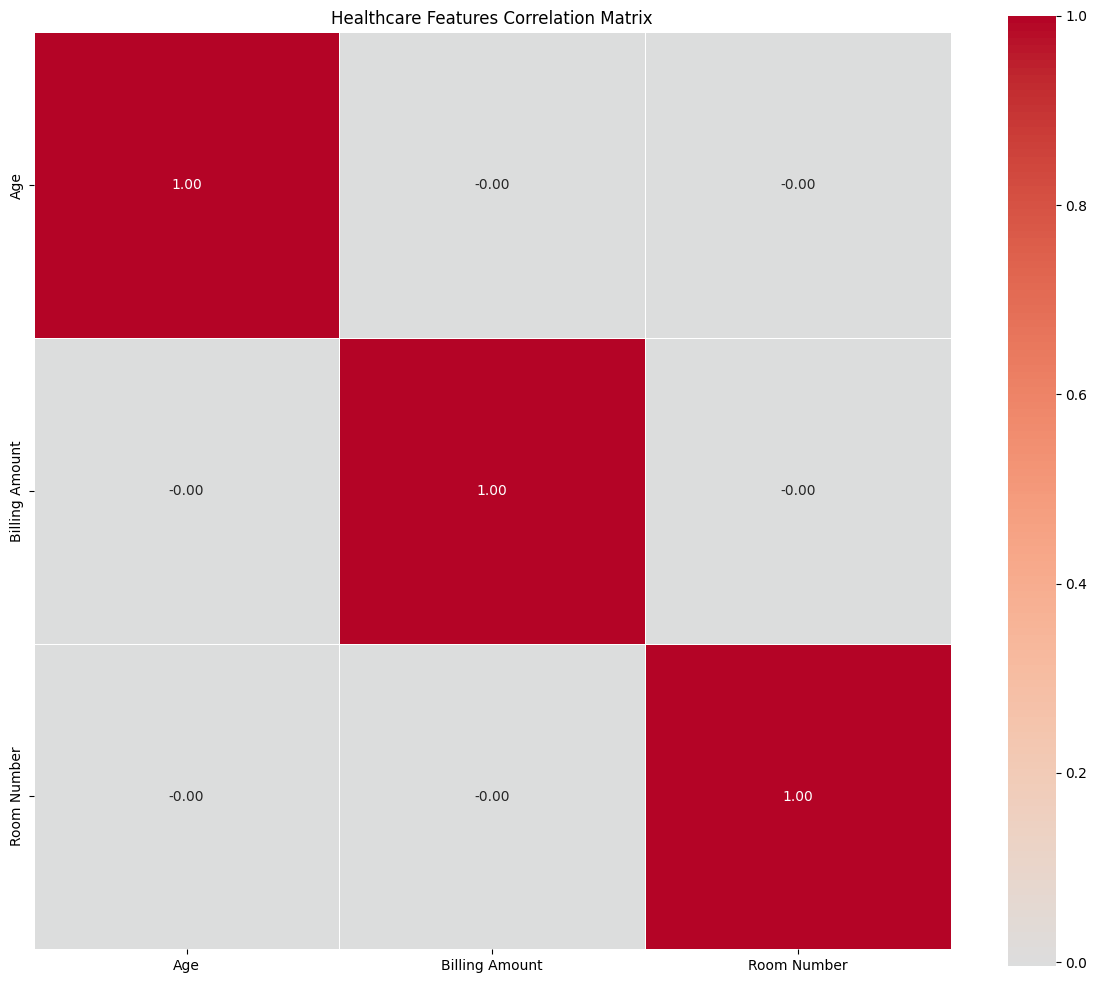

In [6]:
# Feature importance analysis
if csv_files and len(df) > 0:
    # Determine target column
    potential_targets = [col for col in df.columns if any(keyword in col.lower() 
                        for keyword in ['target', 'outcome', 'result', 'diagnosis', 'class'])]
    target_col = potential_targets[0] if potential_targets else df.columns[-1]
    
    # Correlation analysis for numeric features
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_cols) > 1:
        plt.figure(figsize=(12, 10))
        
        correlation_matrix = df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                    fmt='.2f', square=True, linewidths=0.5)
        plt.title('Healthcare Features Correlation Matrix')
        plt.tight_layout()
        plt.show()
        
        # Show correlations with target
        if target_col in correlation_matrix.columns:
            target_corr = correlation_matrix[target_col].abs().sort_values(ascending=False)
            print(f"\nFeature correlations with {target_col}:")
            print(target_corr.head(10))

In [ ]:
# Categorical feature analysis
if csv_files and len(df) > 0:
    # Determine target column
    potential_targets = [col for col in df.columns if any(keyword in col.lower() 
                        for keyword in ['target', 'outcome', 'result', 'diagnosis', 'class'])]
    target_col = potential_targets[0] if potential_targets else df.columns[-1]
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_features = [col for col in categorical_cols if col != target_col]
    
    if categorical_features:
        print(f"\nCategorical features analysis:")
        
        # Analyze relationship between categorical features and target
        for feature in categorical_features[:3]:  # Limit to first 3
            print(f"\n{feature} vs {target_col}:")
            cross_tab = pd.crosstab(df[feature], df[target_col])
            print(cross_tab)
            
            # Calculate percentages
            cross_tab_pct = pd.crosstab(df[feature], df[target_col], normalize='index') * 100
            print(f"\nPercentages:")
            print(cross_tab_pct.round(2))
        
        # Visualize categorical relationships
        if len(categorical_features) > 0:
            n_plots = min(2, len(categorical_features))
            fig, axes = plt.subplots(1, n_plots, figsize=(15, 5))
            if n_plots == 1:
                axes = [axes]
            
            for i, feature in enumerate(categorical_features[:n_plots]):
                cross_tab = pd.crosstab(df[feature], df[target_col])
                cross_tab.plot(kind='bar', ax=axes[i])
                axes[i].set_title(f'{feature} vs {target_col}')
                axes[i].tick_params(axis='x', rotation=45)
                axes[i].legend(title=target_col)
            
            plt.tight_layout()
            plt.show()


Categorical features analysis:

Name vs Test Results:
Test Results       Abnormal  Inconclusive  Normal
Name                                             
AARON DuncAn              1             0       0
AARON HicKS               0             1       0
AARON bAldWIN Jr.         1             0       0
AARON hAWkIns             1             0       0
AAROn HaRt                1             0       0
...                     ...           ...     ...
zachaRy huLL              0             0       1
zachaRy oDOM              1             0       0
zachaRy raMirEZ           0             1       0
zacharY BauTista          0             2       0
zachary WALl              0             0       1

[49992 rows x 3 columns]

Percentages:
Test Results       Abnormal  Inconclusive  Normal
Name                                             
AARON DuncAn          100.0           0.0     0.0
AARON HicKS             0.0         100.0     0.0
AARON bAldWIN Jr.     100.0           0.0     0.0
AARON

In [ ]:
# Dataset summary for machine learning
if csv_files and len(df) > 0:
    # Determine target column
    potential_targets = [col for col in df.columns if any(keyword in col.lower() 
                        for keyword in ['target', 'outcome', 'result', 'diagnosis', 'class'])]
    target_col = potential_targets[0] if potential_targets else df.columns[-1]
    
    print("\nMachine Learning Readiness Assessment:")
    print(f"- Total samples: {len(df):,}")
    print(f"- Total features: {len(df.columns) - 1}")
    print(f"- Target variable: {target_col}")
    print(f"- Target classes: {df[target_col].nunique()}")
    
    # Feature types
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = df.select_dtypes(include=['object']).columns
    
    print(f"- Numeric features: {len(numeric_features)}")
    print(f"- Categorical features: {len(categorical_features)}")
    
    # Class balance
    class_distribution = df[target_col].value_counts(normalize=True) * 100
    print(f"\nClass distribution:")
    for class_val, percentage in class_distribution.items():
        print(f"- {class_val}: {percentage:.1f}%")
    
    # Data quality
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    if missing_percentage.sum() > 0:
        print(f"\nMissing data:")
        print(missing_percentage[missing_percentage > 0])
    else:
        print("\n✅ No missing data - Ready for ML!")


Machine Learning Readiness Assessment:
- Total samples: 55,500
- Total features: 14
- Target variable: Test Results
- Target classes: 3
- Numeric features: 3
- Categorical features: 12

Class distribution:
- Abnormal: 33.6%
- Normal: 33.4%
- Inconclusive: 33.1%

✅ No missing data - Ready for ML!


In [ ]:
print("✅ Dataset download and analysis completed successfully!")
print("\nDataset Summary:")
print(f"- Location: {path}")
print(f"- Size: {total_size/(1024*1024):.2f} MB (Small & manageable!)")
if csv_files:
    print(f"- Records: {df.shape[0]:,}")
    print(f"- Features: {df.shape[1]}")
print("- Use case: Multi-class classification, healthcare outcome prediction")
print("- Perfect for: Module 5 (Machine Learning), algorithm comparison, model evaluation")
print("- Ideal for: Classification algorithms, feature engineering, cross-validation")

✅ Dataset download and analysis completed successfully!

Dataset Summary:
- Location: /home/tamim/ai4ph/data/healthcare_classification/data
- Size: 8.01 MB (Small & manageable!)
- Records: 55,500
- Features: 15
- Use case: Multi-class classification, healthcare outcome prediction
- Perfect for: Module 5 (Machine Learning), algorithm comparison, model evaluation
- Ideal for: Classification algorithms, feature engineering, cross-validation
